# Imports

- **Replace Null Values in Age column**

### 4- Handle Outliers

- **Check for Outliers**

In [31]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [32]:
df = pd.read_csv('Titanic\\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df.drop(['PassengerId','Name', 'Ticket'], axis = 1, inplace= True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Chk datatype

In [34]:
dtypes = df.dtypes
n_uniq = df.nunique()
pd.DataFrame({"Dtype":dtypes, "Num_Uniqe":n_uniq}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,object,float64,int64,int64,float64,object,object
Num_Uniqe,2,3,2,88,7,7,248,147,3


In [35]:
def chk_types(data):
    dtypes = df.dtypes
    n_uniq = df.nunique()
    
    return pd.DataFrame({"Dtype":dtypes, "Num_Uniqe":n_uniq}).T

In [36]:
def chk_types_table(data):
    return pd.DataFrame({
        "Dtype": data.dtypes,
        "Num_Unique": data.nunique()
    }).T


In [37]:
chk_types_table(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,object,float64,int64,int64,float64,object,object
Num_Unique,2,3,2,88,7,7,248,147,3


In [38]:
cols = ['Pclass',
        'Survived',
        'Sex',
        'SibSp',
        'Parch',
        'Embarked']
df[cols] = df[cols].astype('category')


In [39]:
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,category,category,category,float64,category,category,float64,object,category
Num_Uniqe,2,3,2,88,7,7,248,147,3


In [40]:
df.shape[0]

891

In [41]:
null = df.isnull().sum()
ratio = (null/ df.shape[0])*100
pd.DataFrame({"Null":null, "ratio % ":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
ratio %,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [42]:
median_1 = df['Age'].median()
df['Age'].fillna(median_1, inplace=True)


In [43]:
df.dropna(subset=['Embarked'], inplace= True)
df = df.drop("Cabin", axis=1)

In [44]:
null = df.isnull().sum()
ratio = (null/ df.shape[0])*100
pd.DataFrame({"Null":null, "ratio % ":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ratio %,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


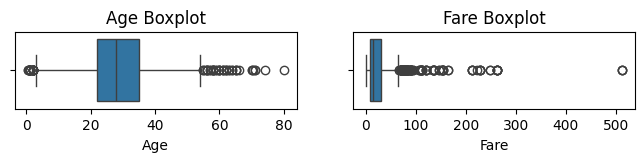

In [45]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i , col in enumerate(num_cols):
    plt.subplot(1,2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} Boxplot")

In [46]:
def outliers_change(num_cols):
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_fence = Q1 -  1.5*IQR
        upper_fence = Q3 +  1.5*IQR
        # print(lower_fence)
        lower_outliers = df[df[col]< lower_fence][col].values
        upper_outliers = df[df[col]> upper_fence][col].values
        
        df[col].replace(lower_outliers, lower_fence, inplace=True)
        df[col].replace(upper_outliers, upper_fence, inplace=True)

    # upper_outliers = 
    


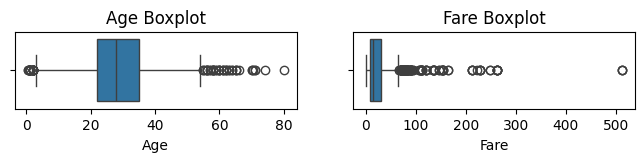

In [47]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i , col in enumerate(num_cols):
    plt.subplot(1,2, i+1)
    sns.boxplot(df[col], orient="h")
    plt.title(f"{col} Boxplot")

In [48]:
df.duplicated().sum()

np.int64(116)

In [49]:
df.drop_duplicates(inplace=True)

In [50]:
df.duplicated().sum()

np.int64(0)

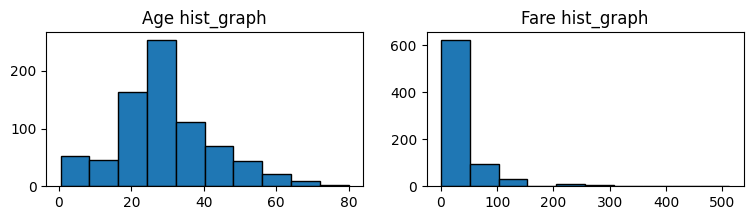

In [51]:
plt.figure(figsize=(9,2))
for i , col in enumerate(num_cols):
    plt.subplot(1, 2, i + 1 )
    plt.hist(df[col], edgecolor = 'black')
    plt.title(f"{col} hist_graph")
plt.show()

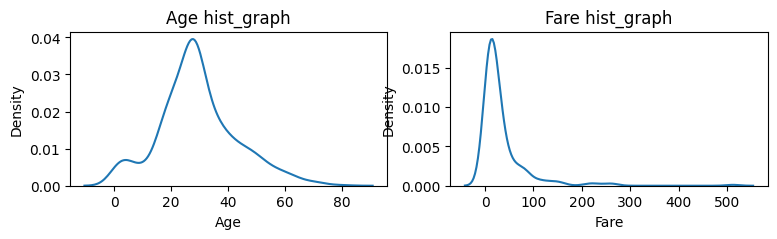

In [55]:
plt.figure(figsize=(9,2))
for i , col in enumerate(num_cols):
    plt.subplot(1, 2, i + 1 )
    sns.kdeplot(df[col])
    plt.title(f"{col} hist_graph")
plt.show()

In [56]:
cat_cols =df.select_dtypes('category').columns

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

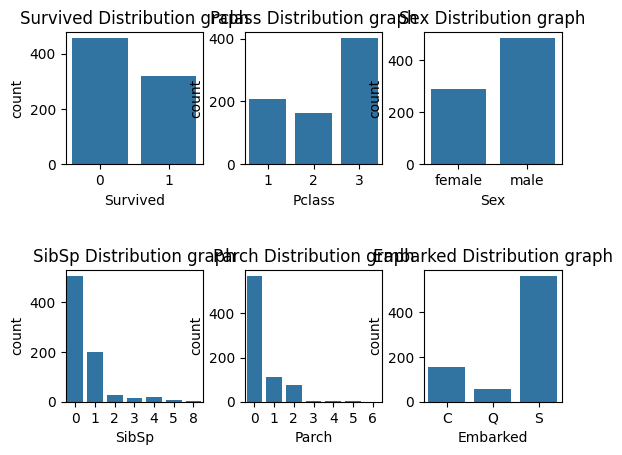

In [57]:
plt.Figure(figsize=(14,4))
for i,col in enumerate(cat_cols):
     plt.subplot(2, 3, i+1)
     sns.countplot(x=col,data=df)
     plt.title(f"{col} Distribution graph")
plt.subplots_adjust(hspace=.8,wspace=.3)
plt.show()

In [ ]:
unique =df['Survived'].value_counts()
count=unique.values
count

array([455, 318])

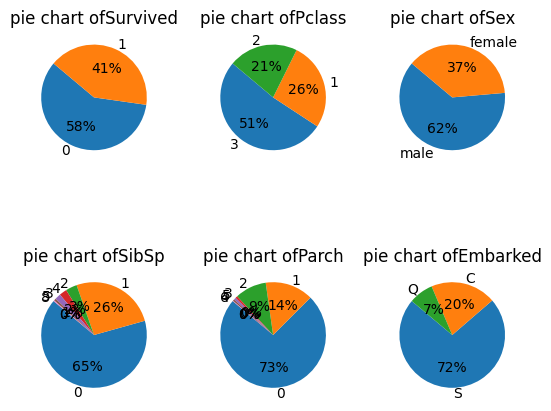

In [62]:
plt.Figure(figsize=(9,4))
for i,col in enumerate(cat_cols):
     plt.subplot(2, 3, i+1)
     unique=df[col].value_counts()
     count = unique.values
     categories=unique.index
     plt.pie(count,labels=categories,startangle=140,autopct='%1.1d%%')
     plt.title(f"pie chart of{col}")
plt.subplots_adjust(hspace=.8,wspace=.3)
plt.show()

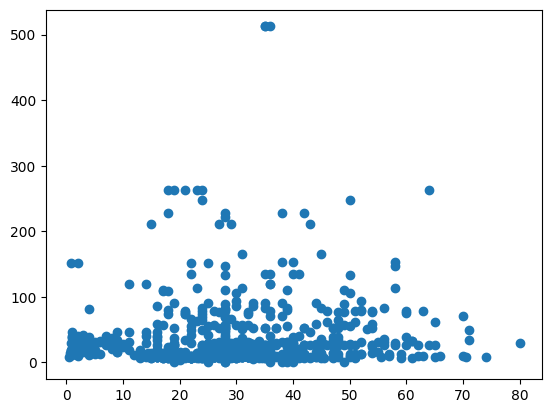

In [64]:
plt.scatter(df['Age'],df['Fare'])
plt.show()


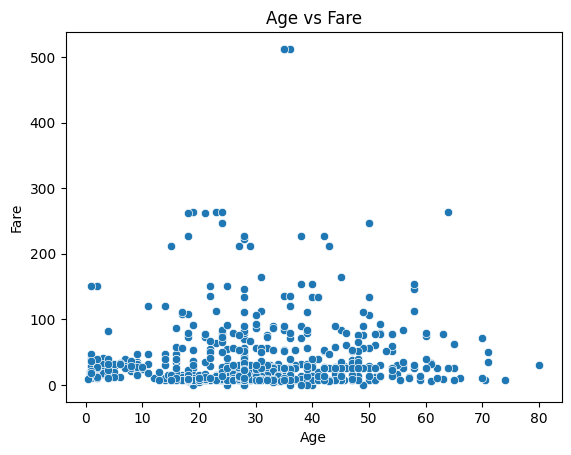

In [65]:
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title("Age vs Fare")
plt.show()

In [61]:
corr = df[["Age","Fare"]].corr()
corr

,Age,Fare
Age,1.000000,0.089624
Fare,0.089624,1.000000


In [66]:
agg= df.pivot_table(index='Survived',columns='Sex',values='Age',aggfunc=len)
agg

Sex,female,male
Survived,,
0,76,379
1,214,104


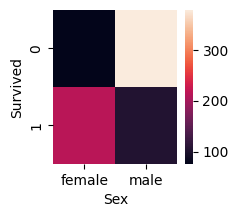

In [67]:
plt.figure(figsize=(2,2))
agg= df.pivot_table(index='Survived',columns='Sex',values='Age',aggfunc=len)
sns.heatmap(agg)
plt.show()

In [69]:
x=df.drop['Survived']
y=df['Survived']

TypeError: 'method' object is not subscriptable

In [73]:
from sklearn.preprocessing.import MinMaxScaler
num_col=x.select_dtypes('number').columns
scalar=MinMaxScaler()
scalar.fit(x[num_cols])
x[num_cols]=scalar.transform([x[num_cols]])

SyntaxError: invalid syntax (2318720245.py, line 1)

In [70]:
str_cols=['Sex','Embarked']

In [ ]:
from category_encoders import OneHotEncoder
encode = OneHotEncoder(col=str_cols,drop_invariant=True)
x=encoder.fit_transform(x)

In [74]:
from sklearn.preprocessing import MinMaxScaler
num_col=x.select_dtypes('number').columns
scalar=MinMaxScaler()
scalar.fit(x[num_cols])
x[num_cols]=scalar.transform([x[num_cols]])

NameError: name 'x' is not defined